In [1]:
# Reads in photometry from different sources, normalizes them, and puts them
# onto a BJD time scale

# Created 2021 Dec. 28 by E.S.

In [1]:
import numpy as np
import pandas as pd
from astropy.time import Time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
file_name_photometry_input = "./all_photometry_program_stars/polished/bh_peg_aavso_polished_ingest.txt"
period_input = 0.640993 # Monson 2017 period of BH Peg

In [3]:
# read in photometry

df_test2 = pd.read_csv(file_name_photometry_input,
                       names=["jd","mag","error"], delim_whitespace=True)

In [4]:
# phase-folded data

df_phase_folded = pd.DataFrame(data=np.mod(df_test2["jd"],period_input).values, columns=["phase"])
df_phase_folded["mag"] = df_test2["mag"]

In [5]:
# find where maximum is, and set the phase there to be zero

idx_max = df_phase_folded["mag"] == np.min(df_phase_folded["mag"])
df_phase_folded["phase"] = np.subtract(df_phase_folded["phase"],df_phase_folded["phase"][idx_max])

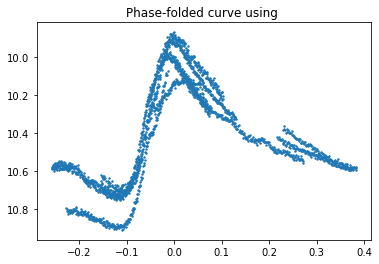

In [6]:
# quick plot

plt.clf()
plt.scatter(df_phase_folded["phase"], df_phase_folded["mag"], s=2)
plt.title("Phase-folded curve using ")
plt.gca().invert_yaxis()
plt.show()

In [7]:
# write out

file_name_out = "./data/phase_folded_curves/junk.csv"
df_phase_folded.to_csv(file_name_out)
print("Wrote ", file_name_out)